### Import  necessary models

In [1]:
# !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, \
f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
# from imblearn.over_sampling import SMOTE

In [4]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder(sparse=False)

In [5]:
!ls

'Chstomer Churn.md'
'Predicting Customer Churn from telecom data.ipynb'
 requirements.txt
 telecom_customer_churn.csv
 venv


In [6]:
df = pd.read_csv('telecom_customer_churn.csv')

In [7]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

In [8]:
df.head()

,State,Account_Length,Area_Code,Phone_Number,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Drop unneccesary features from the dataframe. According to my observation on given telecom data **Area_Code** and **Phone_Number** are not important fetures that's why I am removeing this features from the dataframe.

In [9]:
df.drop(['Area_Code','Phone_Number'], axis=1, inplace=True)
df.head()

,State,Account_Length,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Churn Visualization

In [10]:
import matplotlib as mat
import matplotlib.pyplot as plt

In [11]:
length = df.Churn.value_counts(sort=True)
colors = ['pink','yellow']
labels = ['Non-Churn','Churn']
mat.rcParams['figure.figsize'] = 7,7

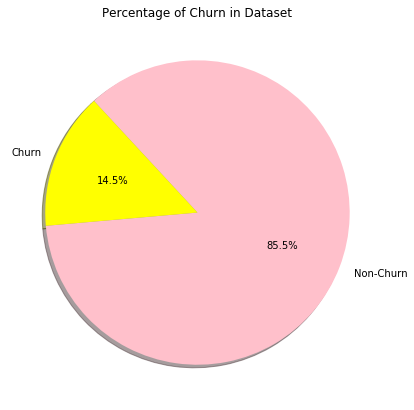

In [12]:
## plot piechart of churn feature
plt.pie(length, labels=labels, colors=colors, 
       autopct='%1.1f%%', shadow = True, startangle = 185)
plt.title("Percentage of Churn in Dataset")
plt.show()

### Helper functions


**Precision :** A model with high precision means **not many non-churners were classified as churners**. It means predicts few false positives.

**Recall :** A model with high recall means it correctly classified most churners. 

In [13]:
def generate_report(X, Y):
    precision = precision_score(X,Y)
    recall = recall_score(X,Y)
    F1_score = f1_score(X,Y)
    Accuracy_score = accuracy_score(X,Y)
    print("Accuracy Score : ",Accuracy_score)
    print("Precision Score : ",precision)
    print("Recall Score : ",recall)
    print("F1 Score : ",F1_score)

In [14]:
def generate_auc_roc_curve(clf, x_test):
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = 'AUC ROC Curve with Area under the curve'+str(auc))
    plt.legend(loc=4)
    plt.show()

In [15]:
def rf_feat_importance(clf, df_for_model):
    return pd.DataFrame({'cols':df_for_model.columns, 'imp':clf.feature_importances_}
                       ).sort_values('imp', ascending=False)

### Feature encoding


In [16]:
df.dtypes

State                      object
Account_Length              int64
International_Plan         object
Voice_Mail_Plan            object
Number_Vmail_Messages       int64
Total_Day_Minutes         float64
Total_Day_Calls             int64
Total_Day_Charge          float64
Total_Eve_Minutes         float64
Total_Eve_Calls             int64
Total_Eve_Charge          float64
Total_Night_Minutes       float64
Total_Night_Calls           int64
Total_Night_Charge        float64
Total_Intl_Minutes        float64
Total_Intl_Calls            int64
Total_Intl_Charge         float64
Customer_Service_Calls      int64
Churn                        bool
dtype: object

The above cell shows the data type of columns. The State, Phone_Number, International_Plan and Voice_Mail_Plan are objet types. The target column 'Churn' is boplean types and remaining are integer and floats.

If you want to build model with high accuracy then there is need to convert categorical columns into numerical columns. In above dataframe 'State' feature is categorical. So, converting categorical columns to numerical using the encoding (label encoding and one hot encoding).

In [17]:
state = pd.get_dummies(df.State)
state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_new = pd.concat([df,state],axis=1)
df_new.head()

,State,Account_Length,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_new.drop(['State','AK'], axis=1, inplace=True)
df_new.head()

,Account_Length,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_new.columns

Index(['Account_Length', 'International_Plan', 'Voice_Mail_Plan',
       'Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls',
       'Total_Day_Charge', 'Total_Eve_Minutes', 'Total_Eve_Calls',
       'Total_Eve_Charge', 'Total_Night_Minutes', 'Total_Night_Calls',
       'Total_Night_Charge', 'Total_Intl_Minutes', 'Total_Intl_Calls',
       'Total_Intl_Charge', 'Customer_Service_Calls', 'Churn', 'AL', 'AR',
       'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

### Feature Scalling

In [21]:
df_new.Total_Intl_Calls.describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total_Intl_Calls, dtype: float64

In [22]:
df_new.Total_Night_Minutes.describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Total_Night_Minutes, dtype: float64

The above two cells showing the huge diffrence between values of two columns. If you train the model without scalling then algorithm gives high importance to the **Total_Night_Minutes** feature as compared with **Total_Intl_Calls** feature.  

If feature scalling is applied to the given dataframe then values of all numerical columns are in equal range and algorithm also gives equal importance to all.

In [23]:
df_new.head()

,Account_Length,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


The below list having numerical values. Build a seprate a dataframe and drop this features from original and apply standardization on the new dataframe named as **df_for_stand**. And finally make a dataframe of standardization array and merge with the original dataframe which is **df_new**.

In [24]:
column_list = ['Number_Vmail_Messages','Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge', 'Total_Eve_Minutes',
               'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes', u'Total_Night_Calls',
               'Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls']

In [25]:
df_for_stand = df_new[column_list]

In [26]:
df_new.drop(column_list,axis=1, inplace=True)

In [27]:
df_for_stand = StandardScaler().fit_transform(df_for_stand)

In [28]:
df_for_stand = pd.DataFrame(df_for_stand, columns=column_list)

In [29]:
df_new = pd.concat([df_new, df_for_stand], axis=1)

In [106]:
df_new.head()

,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195


In [31]:
df[column_list].head()

,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3


In [32]:
df_new[column_list].head()

,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195


In [33]:
df_new.head()

,Account_Length,International_Plan,Voice_Mail_Plan,Total_Intl_Charge,Customer_Service_Calls,Churn,AL,AR,AZ,CA,...,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls
0,128,no,yes,2.70,1,False,0,0,0,0,...,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195
1,107,no,yes,3.70,1,False,0,0,0,0,...,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195
2,137,no,no,3.29,0,False,0,0,0,0,...,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534
3,84,yes,no,1.78,2,False,0,0,0,0,...,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263
4,75,yes,no,2.73,3,False,0,0,0,0,...,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195


### Building Model


In [34]:
clf = RandomForestClassifier(random_state=32)

In [35]:
df_for_model = df_new.copy()

In [36]:
categorical_feature =['International_Plan','Voice_Mail_Plan']

In [37]:
for feature in categorical_feature:
    inter_plan  = label_encoder.fit_transform(df_for_model[feature])
    encoded_feature = pd.DataFrame(inter_plan,columns=[feature])
    df_for_model.drop(feature, axis=1, inplace=True)
    df_for_model = pd.concat([df_for_model, encoded_feature], axis=1)
    encoded_feature={}

In [38]:
df_for_model.Churn = label_encoder.fit_transform(df_for_model['Churn'])

In [39]:
df_for_model.Churn.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [40]:
churn = df_for_model.Churn
df_for_model.drop(['Churn'], axis=1, inplace=True)

In [41]:
clf.fit(df_for_model, churn)

/home/anil/Desktop/Customer_churn/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [42]:
clf.score(df_for_model, churn)

0.993099309930993

### Dataset divided into training and testing data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(df_for_model, churn, test_size = 0.2, random_state = 45)

In [44]:
print('Training data shape : ', X_train.shape)
print("Testing data shape : ", X_test.shape)
print("Training target variable data shape : ",Y_train.shape)
print("Testing target variable data shape : ",Y_test.shape)

Training data shape :  (2666, 67)
Testing data shape :  (667, 67)
Training target variable data shape :  (2666,)
Testing target variable data shape :  (667,)


In [45]:
Y_test.value_counts()

0    572
1     95
Name: Churn, dtype: int64

In [46]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [47]:
Y_pred = clf.predict(X_test)

In [48]:
generate_report(Y_test, Y_pred)

Accuracy Score :  0.9250374812593704
Precision Score :  0.9245283018867925
Recall Score :  0.5157894736842106
F1 Score :  0.6621621621621622


In [49]:
clf.score(X_test, Y_test)

0.9250374812593704

### Confusion Matrix

In [50]:
confusion_matrix(Y_test, Y_pred)

array([[568,   4],
       [ 46,  49]])

In [51]:
Y_train.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [52]:
df.corr()

,Account_Length,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
Account_Length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Number_Vmail_Messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total_Day_Minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total_Day_Calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total_Day_Charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total_Eve_Minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total_Eve_Calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total_Eve_Charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total_Night_Minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
Total_Night_Calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


In the above table **Total_Day_Minutes & Total_Day_Charge** are highly correlated. Same as **Total_Eve_Minutes & Total_Eve_Charge**, **Total_Night_Minutes & Total_Night_Charge**, **Total_Intl_Minutes & Total_Intl_Charge** are also highly correlated.

Delete a one column from each pair because this column repeated the same information again. 

In [53]:
X_train.drop(['Total_Day_Charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'], axis=1, inplace=True)

/home/anil/Desktop/Customer_churn/venv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
X_test.drop(['Total_Day_Charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'], axis=1, inplace=True)

#### Random Forest Classifier

In [55]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
confusion_matrix(Y_test,y_pred)

array([[566,   6],
       [ 59,  36]])

In [58]:
print("Generate Reports")
generate_report(Y_test, Y_pred)

Generate Reports
Accuracy Score :  0.9250374812593704
Precision Score :  0.9245283018867925
Recall Score :  0.5157894736842106
F1 Score :  0.6621621621621622


In [59]:
clf.score(X_test,Y_test)

0.9025487256371814

#### Logistic Regression


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(random_state=12)

In [62]:
model.fit(X_train,Y_train)

/home/anil/Desktop/Customer_churn/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred = model.predict(X_test)

In [65]:
generate_report(Y_test,y_pred)

Accuracy Score :  0.8545727136431784
Precision Score :  0.47368421052631576
Recall Score :  0.18947368421052632
F1 Score :  0.27067669172932335


### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_params = {'n_estimators':range(50,60), 'criterion':['gini','entropy'], 'max_depth':range(8,12), \
                'max_features':['auto','sqrt','log2'], 'random_state':range(12,13)
              }

In [68]:
# gridsearch = GridSearchCV(clf, grid_params)

In [69]:
# gridsearch.fit(X_train, Y_train)

In [70]:
# gridsearch.best_params_

In [71]:
# gridsearch.best_params_

In [72]:
clf = RandomForestClassifier(n_estimators=52, criterion='entropy',oob_score=False,\
                             max_depth=10, max_features=0.6, random_state=12)

In [73]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=52,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [74]:
y_pred = clf.predict(X_test)

In [75]:
generate_report(Y_test, y_pred)

Accuracy Score :  0.9610194902548725
Precision Score :  0.9726027397260274
Recall Score :  0.7473684210526316
F1 Score :  0.8452380952380952


In [76]:
confusion_matrix(Y_test,y_pred)

array([[570,   2],
       [ 24,  71]])

In [77]:
clf.score(X_train, Y_train)

0.9816204051012754

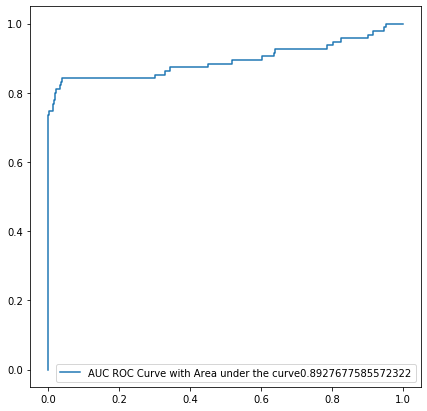

In [78]:
generate_auc_roc_curve(clf, X_test)

### Building new features

In [79]:
# df_new.head()

In [80]:
# df_new_features = df_new.copy()

In [81]:
# df_new_features.columns

According to my observation adding some new feature in the new dataframe. 
1. Calculating **Total_Minutes** by adding **Total_Day_Minutes, Total_Eve_Minutes, Total_Night_Minutes, and Total_Intl_Minutes .**
2. Calculating **Day_Cost** by **Day_mins / Day_Charge.** Likewise calculate **Night_Cost, Eve_Cost, and Intl_Cost** and also calculate **Total_Cost** by adding all costs.

**1. Total_Mins**

In [82]:
# df_new_features['Total_Mins'] = df_new_features['Total_Day_Minutes'] + df_new_features['Total_Eve_Minutes']+\
#                                 df_new_features['Total_Night_Minutes'] + df_new_features['Total_Intl_Minutes']

**2. Costs**

In [83]:
# df_new_features['Day_Cost'] = df_new_features['Total_Day_Minutes'] / df_new_features['Total_Day_Charge']
# df_new_features['Eve_Cost'] = df_new_features['Total_Eve_Minutes'] / df_new_features['Total_Eve_Charge']
# df_new_features['Night_Cost']=df_new_features['Total_Night_Minutes'] / df_new_features['Total_Night_Charge']
# df_new_features['Intl_Cost'] = df_new_features['Total_Intl_Minutes'] / df_new_features['Total_Intl_Charge']

# ## Calculating total costs
# df_new_features['Total_Cost'] = df_new_features['Day_Cost'] + df_new_features['Eve_Cost'] + \
#                                 df_new_features['Night_Cost'] + df_new_features['Intl_Cost']

In [84]:
# df_new_features[['Day_Cost','Eve_Cost','Night_Cost','Intl_Cost','Total_Cost','Total_Mins']].dtypes

In [85]:
# df_new_features.Churn = label_encoder.fit_transform(df_new_features['Churn'])

In [86]:
# churn = df_new_features.Churn
# df_new_features.drop(['Churn'], axis=1, inplace=True)

In [87]:
# categorical_feature =['International_Plan','Voice_Mail_Plan']

In [88]:
# for feature in categorical_feature:
#     inter_plan  = label_encoder.fit_transform(df_new_features[feature])
#     encoded_feature = pd.DataFrame(inter_plan,columns=[feature])
#     df_new_features.drop(feature, axis=1, inplace=True)
#     df_new_features = pd.concat([df_new_features, encoded_feature], axis=1)
#     encoded_feature={}

In [89]:
### Splitting the data in training and testing data.
# X_train, X_test, Y_train, Y_test = train_test_split(df_new_features, churn, test_size = 0.2, random_state = 45)

In [90]:
# print('Training data shape : ', X_train.shape)
# print("Testing data shape : ", X_test.shape)
# print("Training target variable data shape : ",Y_train.shape)
# print("Testing target variable data shape : ",Y_test.shape)

Deleating those having highly correlated.

In [91]:
# X_train.drop(['Total_Day_Charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'], axis=1, inplace=True)
# X_test.drop(['Total_Day_Charge','Total_Eve_Charge','Total_Night_Charge','Total_Intl_Charge'], axis=1, inplace=True)

In [92]:
# clf = RandomForestClassifier(n_estimators=52, criterion='entropy',oob_score=False,\
#                              max_depth=10, max_features=0.6, random_state=12)

In [93]:
# df_new_features.head()

In [94]:
# clf.fit(X_train, Y_train)

In [95]:
# y_pred = clf.predict(X_test)

In [96]:
# generate_report(Y_test, y_pred)

In [97]:
# confusion_matrix(Y_test,y_pred)

In [98]:
# clf.score(X_train, Y_train)

In [99]:
# generate_auc_roc_curve(clf, X_test)

### Balancing Dataset

In [100]:
Y_train.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [101]:
## Total contribution of non-churners in the training data
100*(2278/float(Y_train.shape[0]))

85.4463615903976

In [102]:
## Total contribution of churners in the training data
100*(388/float(Y_train.shape[0]))

14.553638409602401

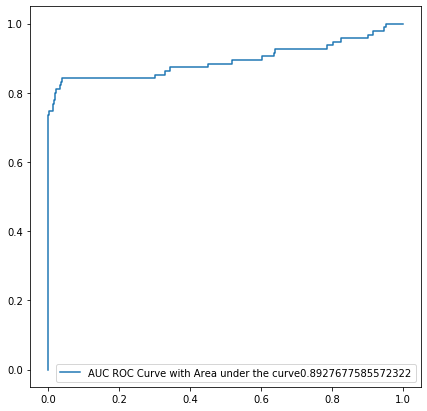

In [103]:
## Generate AUC ROC Curve
generate_auc_roc_curve(clf, X_test)

### SMOTE

In [104]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 2278, 1: 388}

After applying **SMOTE** on the training data

In [105]:
sm = SMOTE(random_state=12, ratio=1.0)
x_train_res,y_train_res = sm.fit_resample(X_train, Y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_smote_value_count

In [ ]:
### without smote data
clf.fit(X_train,Y_train)

In [ ]:
clf.fit(x_train_res,y_train_res)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(len(y_pred))

In [ ]:
precision_score(Y_test, y_pred)

In [ ]:
generate_report(Y_test, y_pred)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = make_pipeline(SMOTE(),RandomForestClassifier())

weights = np.linspace(0.005,0.2,100)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote_ratio' : weights
    },
    scoring = 'f1',
    cv=3)
grid_result = gsc.fit(X_train, Y_train)

grid_result.best_params_